In [0]:
!pip install pycaret

In [0]:
import pandas as pd
from pycaret.classification import *

In [0]:
url = 'https://raw.githubusercontent.com/nukemecha/Project3/master/tosh/data/loans_2011.csv'
df = pd.read_csv(url)

In [0]:
df=df.replace(to_replace="Fully Paid",value= 1)
df=df.replace(to_replace="Charged Off",value= 0)
df=df.replace(to_replace="Current", value = 1)
df=df.replace(to_replace="Default",value= 0)
df=df.replace(to_replace="Late (31-120 days)",value= 0)
df=df.replace(to_replace="In Grace Period",value= 0)
df=df.replace(to_replace="Late (16-30 days)",value= 0)

In [0]:
predata_columns = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',\
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',\
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',\
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc']

In [0]:
df2 = pd.DataFrame()

In [0]:
df2 = df[predata_columns]

In [0]:
df2

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,1,27.65,0,1,3,0,13648,83.7,9
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,1.00,0,5,3,0,1687,9.4,4
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,1,8.72,0,2,2,0,2956,98.5,10
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,1,20.00,0,1,10,0,5598,21.0,37
4,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,1,17.94,0,0,15,0,27783,53.9,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21716,24250,60 months,17.43,473.47,E,2 years,OWN,48000.0,Verified,1,16.35,0,1,7,1,21969,93.5,10
21717,12000,36 months,5.42,361.92,A,NaN,OWN,19008.0,Not Verified,1,7.70,0,0,6,0,3198,10.1,14
21718,12000,60 months,9.99,254.91,B,10+ years,OWN,18000.0,Source Verified,1,3.33,0,0,4,0,496,4.6,13
21719,2500,36 months,5.79,75.82,A,8 years,RENT,40000.0,Not Verified,0,14.70,0,1,10,0,14390,18.4,26


In [0]:
exp_clf = setup(df2, target = 'loan_status')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7690
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(21721, 18)"
4,Missing Values,True
5,Numeric Features,9
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [0]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8468,0.5660,0.9977,0.8484,0.9170,0.0034
1,0.8468,0.6087,0.9984,0.8479,0.9171,-0.0026
2,0.8475,0.5921,0.9984,0.8485,0.9174,0.0047
3,0.8448,0.5876,0.9953,0.8481,0.9158,-0.0005
4,0.8480,0.6075,0.9984,0.8490,0.9177,0.0047
5,0.8480,0.6049,0.9992,0.8486,0.9178,-0.0013
6,0.8461,0.5766,0.9969,0.8482,0.9165,0.0020
7,0.8454,0.5997,0.9953,0.8485,0.9161,0.0066
8,0.8480,0.5930,0.9992,0.8485,0.9177,0.0060
9,0.8467,0.5945,0.9961,0.8492,0.9168,0.0151


In [0]:
pred_holdout = predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.8464,0.5997,0.9973,0.8483,0.9168,0.0022


In [0]:
pred_holdout

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_not_available,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,delinq_2yrs_0,delinq_2yrs_1,delinq_2yrs_11,delinq_2yrs_2,delinq_2yrs_3,delinq_2yrs_4,delinq_2yrs_5,delinq_2yrs_6,delinq_2yrs_7,delinq_2yrs_8,delinq_2yrs_9,inq_last_6mths_0,inq_last_6mths_1,inq_last_6mths_2,inq_last_6mths_3,inq_last_6mths_4,inq_last_6mths_5,inq_last_6mths_6,inq_last_6mths_7,inq_last_6mths_8,pub_rec_0,pub_rec_1,pub_rec_2,pub_rec_3,loan_status,Label,Score
0,30000.0,16.89,696.08,99996.0,18.59,10.0,50190.0,44.8,22.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0.7770
1,5000.0,6.99,154.37,80000.0,3.97,5.0,1807.0,10.8,21.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.8649
2,4650.0,6.62,142.78,37000.0,9.54,7.0,8619.0,57.1,15.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.7481
3,8000.0,17.51,201.03,40000.0,14.07,5.0,6868.0,89.2,11.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0.7152
4,5500.0,15.96,193.26,32000.0,21.49,10.0,9424.0,88.9,14.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.7938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6512,7500.0,14.27,257.32,57000.0,12.44,15.0,5443.0,23.7,29.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.8900
6513,30000.0,10.99,460.30,64000.0,1.59,6.0,2704.0,14.6,22.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.4494
6514,25000.0,20.85,674.23,77508.0,17.36,13.0,36778.0,57.2,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.8298
6515,10200.0,12.68,342.11,75000.0,17.71,8.0,15657.0,88.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.8679


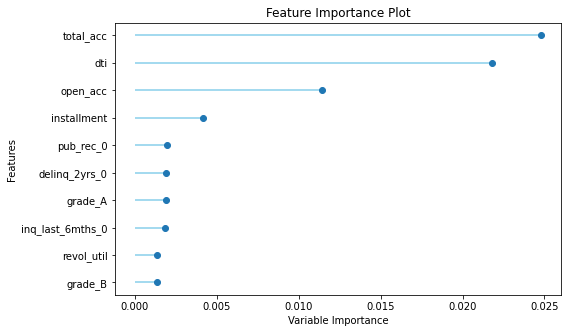

In [0]:
plot_model(lr, plot='feature')

IntProgress(value=0, description='Processing: ', max=5)

KeyboardInterrupt: ignored

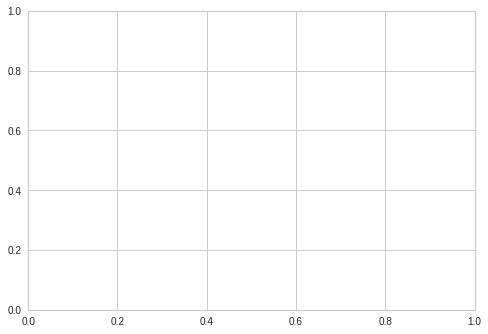